In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv("8-fraud_detection.csv")

In [4]:
data

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0
...,...,...,...
9995,1.066698,-0.548159,0
9996,1.058723,-0.933768,0
9997,0.995099,-0.541924,0
9998,1.758594,-1.549612,0


In [5]:
data.columns

Index(['transaction_amount', 'transaction_risk_score', 'is_fraud'], dtype='object')

In [6]:
data.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [7]:
data["is_fraud"].unique()

array([0, 1])

In [8]:
data["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [9]:
# inbalance dataset

In [10]:
data.isnull().sum()

transaction_amount        0
transaction_risk_score    0
is_fraud                  0
dtype: int64

In [40]:
X = data.drop("is_fraud", axis=1)
y = data["is_fraud"]

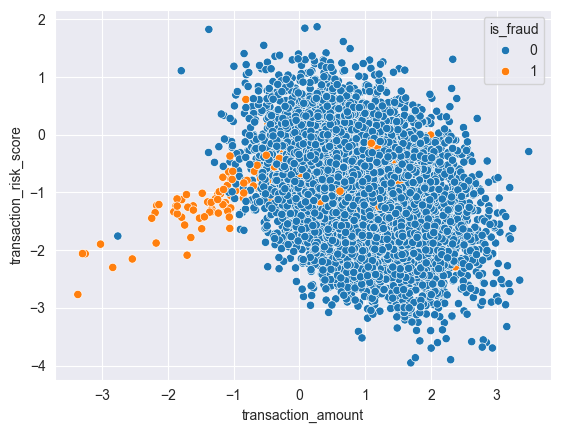

In [41]:
sns.scatterplot(x = X["transaction_amount"], y = X["transaction_risk_score"], hue = y)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# class_weight, Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

penalty = ["l1","l2","elasticnet"]
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ["newton_cg", "lbfgs", "liblinear", "sag", "saga", "newton-cholesky"]
class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1, 10, 50, 100]]

In [46]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [47]:
params = dict(penalty = penalty, C = c_values, solver = solver, class_weight = class_weight)

In [48]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [49]:
cv = StratifiedKFold()

In [50]:
grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv=cv)

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
grid.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton_cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [53]:
y_pred = grid.predict(X_test)

In [54]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(2500,))

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
# y_test, y_pred big dataset

print("Score", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))

Score 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2481
           1       0.42      0.84      0.56        19

    accuracy                           0.99      2500
   macro avg       0.71      0.92      0.78      2500
weighted avg       0.99      0.99      0.99      2500

Confusion Matrix: 
 [[2459   22]
 [   3   16]]


In [63]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'sag'}

In [64]:
grid.best_score_

np.float64(0.9884000000000001)

In [65]:
# roc, auc

The ROC Curve is a graphical representation of a classification model’s performance across different threshold values. It plots the True Positive Rate (Recall) on the Y-axis against the False Positive Rate (1 - Specificity) on the X-axis. • A model that perfectly distinguishes between classes has a curve that reaches the top-left corner. • The closer the curve is to the top-left, the better the model. • The area under the ROC curve (AUC) quantifies this performance: • AUC = 1 → perfect classifier • AUC = 0.5 → random guessing

ROC is especially useful for imbalanced datasets, as it evaluates the model independent of class distribution or threshold.

In [89]:
model_prob = grid.predict_proba(X_test)

In [90]:
model_prob

array([[0.99586424, 0.00413576],
       [0.85288316, 0.14711684],
       [0.95231064, 0.04768936],
       ...,
       [0.98899025, 0.01100975],
       [0.98454102, 0.01545898],
       [0.99758705, 0.00241295]], shape=(2500, 2))

In [91]:
model_prob = model_prob[:,1] #probabilities for the positive (fraud) class

In [92]:
model_prob

array([0.00413576, 0.14711684, 0.04768936, ..., 0.01100975, 0.01545898,
       0.00241295], shape=(2500,))

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

In [94]:
model_auc = roc_auc_score(y_test, model_prob) # 0 and 1 between score

In [95]:
model_auc

0.7393005258882381

In [97]:
#model false positive rate
# model true positive
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob) # graph this curve dot

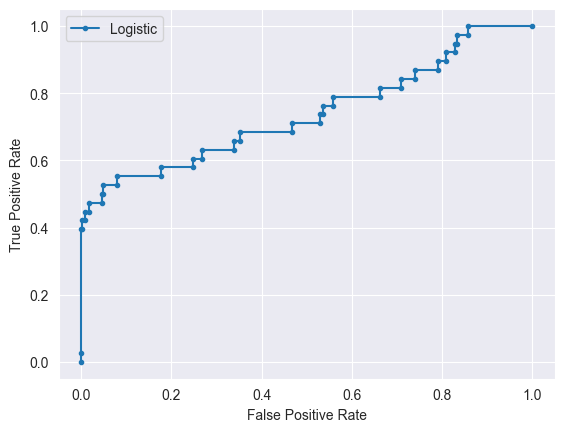

In [111]:
plt.plot(model_fpr, model_tpr, label="Logistic", marker =".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

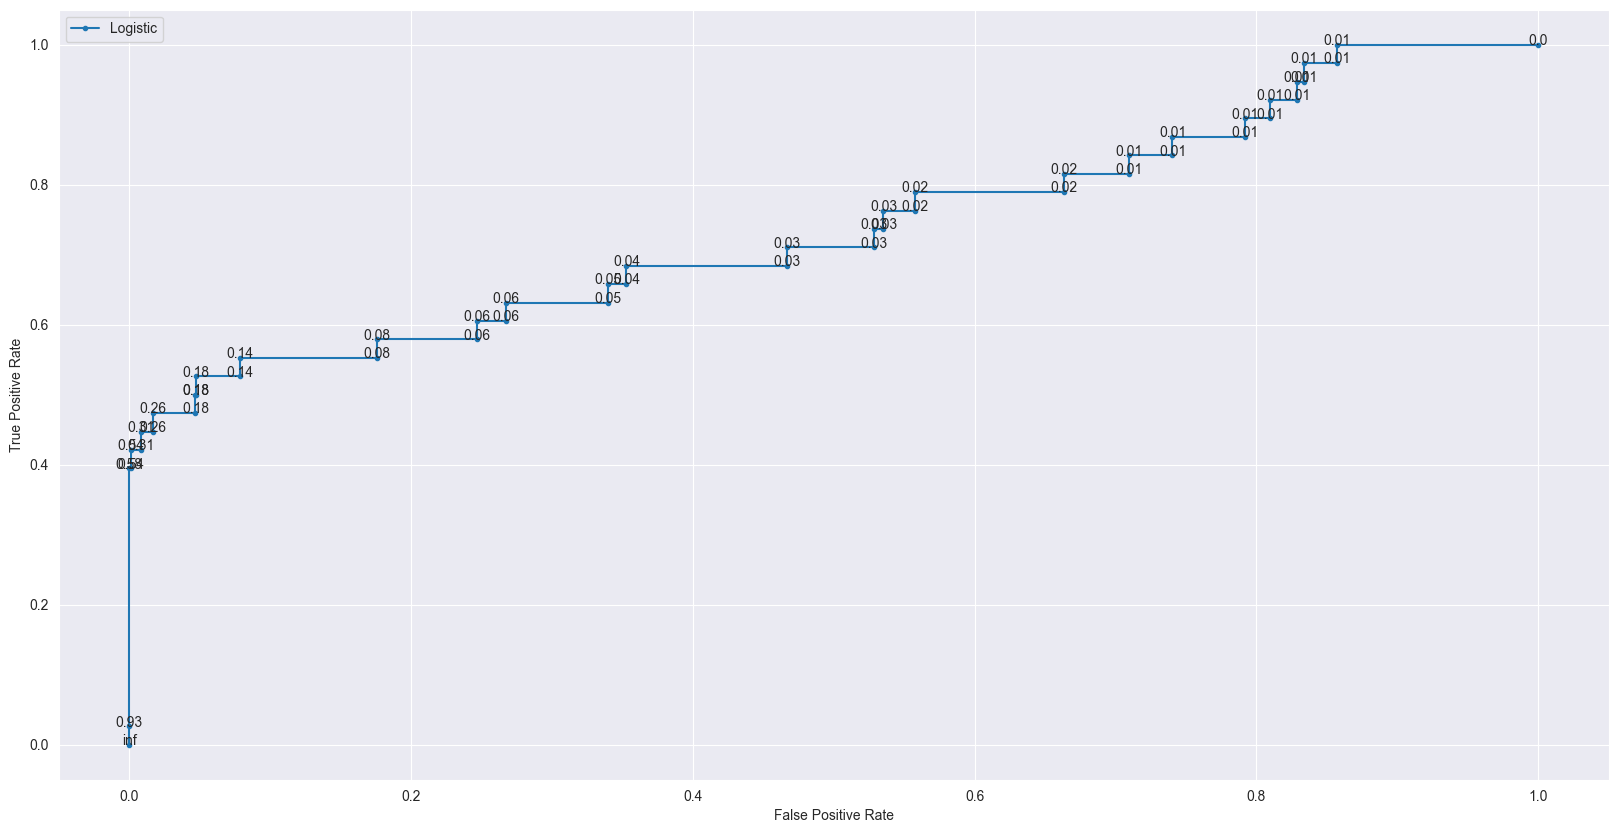

In [103]:
fix, ax = plt.subplots(figsize = (20,10))

ax.plot(model_fpr, model_tpr, label="Logistic", marker =".")

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f"{np.round(thresh, 2)}", (fpr, tpr), ha="center")

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
plt.show()

In [109]:
# Pick a custom threshold (e.g., from your annotated ROC curve)
custom_threshold = 0.5  # You can change this to what you chose

# Predict using custom threshold
y_pred_custom = (model_prob >= custom_threshold).astype(int)

print(confusion_matrix(y_pred_custom, y_test))
print(classification_report(y_pred_custom, y_test))

[[2459   22]
 [   3   16]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2481
           1       0.42      0.84      0.56        19

    accuracy                           0.99      2500
   macro avg       0.71      0.92      0.78      2500
weighted avg       0.99      0.99      0.99      2500



In [105]:
y_pred_custom

array([0, 0, 0, ..., 0, 0, 0], shape=(2500,))

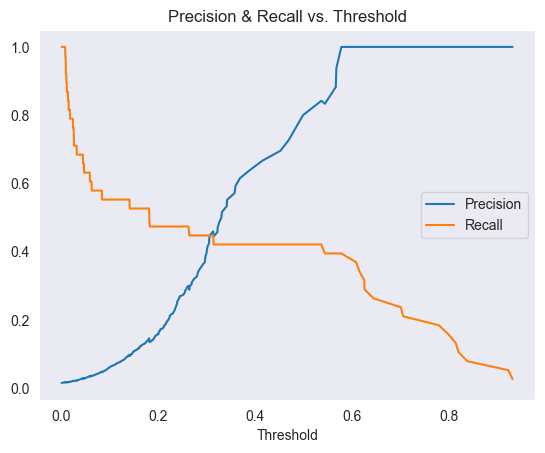

In [110]:
#If you want to find the best threshold based on precision, recall, or F1 you can plot Performance Metrics at Different Thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, model_prob)

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.grid()
plt.show()